In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-37.55402990130791 -64.35467138556575
80.68566617885509 166.7489093276635
61.900203450518944 164.24484267429102
66.42386442205876 -170.27390921373126
-7.643067197469833 -64.77981348462163
-22.1759072376465 -55.58684898430795
0.8239275922618958 152.2622437817845
-83.59032939925414 -69.68215520626379
-30.38571825177887 -143.23836003357164
17.258607955857855 -175.95558864177627
-3.864636659892639 -73.89985589830383
-69.11406674949825 -151.33696154944525
-13.102348329535431 -135.77175693746614
-40.18689063203438 -55.714965554836255
-67.9921455745936 147.01254864830736
70.92868253352526 4.6994954695298645
-3.72971837374989 141.59386507996788
53.11299573109932 -28.731014310350446
-36.678507407235905 29.267732941686546
-19.387083400994044 -134.74885284547227
-38.309362451501684 159.62410847864442
74.29708298001557 -73.7692316786821
42.02044312610471 -144.42065800770212
9.492735351059835 -47.000349311641
-19.24226157280863 109.77612506045233
48.66158523352138 -102.85676435414783
-58.5643700931

74.64547905947916 139.94816630974316
-66.75201814448889 149.29828779185863
18.614108759476693 -156.83510412851132
-11.49276845091596 20.053853114394315
-45.806254986582715 -75.2291878903125
-81.69408386922709 30.966828104337054
-65.23605608237486 -154.28649757391892
19.571611543145053 -134.7903525330291
16.35593541244451 -86.3061703165789
-3.6554368120666396 117.66019961447068
22.156860621124693 105.1797056781885
-22.656623604989093 113.89348465377128
-34.13526989285227 -146.26300093448154
-86.60166513399756 -149.5521860266717
58.76257073776159 -73.07176121474605
-14.748299810637306 -119.96671833855032
-80.49180470914705 -151.27555857726776
81.04842188168527 -15.396039437221106
-85.43135294855796 -161.85767532080976
49.780442988385346 -85.34301833965714
-60.18246739520916 -54.685481804807424
-62.585125128870104 136.25717345460936
18.60320702669084 -108.59143866917684
18.639806996011984 -43.89961190088991
47.52141035614298 -48.77415961316336
-50.62202263827659 96.7678867143415
56.383670

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f16ea47af7203c505dece9b737c933e


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
 #Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa rosa
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 4 of Set 1 | lavrentiya
Processing Record 5 of Set 1 | labrea
Processing Record 6 of Set 1 | ponta pora
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | iquitos
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | sistranda
Processing Record 16 of Set 1 | aitape
Processing Record 17 of Set 1 | grindavik
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | nelson bay
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | sitka
Processing Record 23 o

Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | todos santos
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | kita
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | pathein
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | mangrol
Processing Record 47 of Set 4 | xining
Processing Record 48 of Set 4 | ramotswa
Processing Record 49 of Set 4 | chicama
Processing Record 50 of Set 4 | samarai
Processing Record 1 of Set 5 | bongandanga
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | kondinskoye
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | tombouctou
Processing Record 8 of Set 5 | kaitangata
Processing Record 9 of Set 5 | pangnirtu

Processing Record 25 of Set 8 | sioux lookout
Processing Record 26 of Set 8 | coihaique
Processing Record 27 of Set 8 | anadyr
Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | umm lajj
Processing Record 30 of Set 8 | san quintin
Processing Record 31 of Set 8 | roald
Processing Record 32 of Set 8 | shache
Processing Record 33 of Set 8 | beyneu
Processing Record 34 of Set 8 | olafsvik
Processing Record 35 of Set 8 | aykhal
Processing Record 36 of Set 8 | kiama
Processing Record 37 of Set 8 | keetmanshoop
Processing Record 38 of Set 8 | zihuatanejo
Processing Record 39 of Set 8 | nalut
Processing Record 40 of Set 8 | chake chake
Processing Record 41 of Set 8 | muncar
Processing Record 42 of Set 8 | mehran
Processing Record 43 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 8 | eenhana
Processing Record 45 of Set 8 | aksha
Processing Record 46 of Set 8 | tarudant
City not found. Skipping...
Processing Record 47 of Set 8 | sainte

Processing Record 11 of Set 12 | santa isabel do rio negro
Processing Record 12 of Set 12 | byron bay
Processing Record 13 of Set 12 | quimperle
Processing Record 14 of Set 12 | damphu
Processing Record 15 of Set 12 | morehead
Processing Record 16 of Set 12 | alekseyevka
Processing Record 17 of Set 12 | synya
Processing Record 18 of Set 12 | turayf
Processing Record 19 of Set 12 | beidao
Processing Record 20 of Set 12 | humaita
Processing Record 21 of Set 12 | karamay
City not found. Skipping...
Processing Record 22 of Set 12 | vardo
Processing Record 23 of Set 12 | keti bandar
Processing Record 24 of Set 12 | ambilobe
Processing Record 25 of Set 12 | odweyne
Processing Record 26 of Set 12 | batagay
Processing Record 27 of Set 12 | aykino
Processing Record 28 of Set 12 | omboue
Processing Record 29 of Set 12 | solnechnyy
Processing Record 30 of Set 12 | belle glade
Processing Record 31 of Set 12 | kudahuvadhoo
Processing Record 32 of Set 12 | marsa matruh
Processing Record 33 of Set 12

In [14]:
len(city_data)

546

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Rosa,14.3122,121.1114,85.10,86,99,13.47,PH,2022-11-15 01:31:11
1,Pevek,69.7008,170.3133,-9.49,100,100,3.09,RU,2022-11-15 01:26:43
2,Lavrentiya,65.5833,-171.0000,21.60,87,17,8.19,RU,2022-11-15 01:31:11
3,Labrea,-7.2586,-64.7981,75.70,89,100,0.94,BR,2022-11-15 01:31:12
4,Ponta Pora,-22.5361,-55.7256,61.14,90,0,3.15,BR,2022-11-15 01:31:12
5,Kavieng,-2.5744,150.7967,85.60,69,73,9.71,PG,2022-11-15 01:31:12
6,Ushuaia,-54.8000,-68.3000,47.86,81,0,4.61,AR,2022-11-15 01:31:13
7,Mataura,-46.1927,168.8643,73.17,39,98,3.98,NZ,2022-11-15 01:31:13
8,Kapaa,22.0752,-159.3190,82.38,72,40,14.97,US,2022-11-15 01:31:13
9,Iquitos,-3.7481,-73.2472,75.24,94,75,2.30,PE,2022-11-15 01:31:14


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

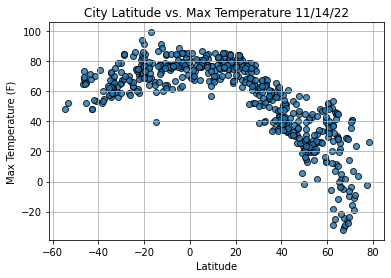

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

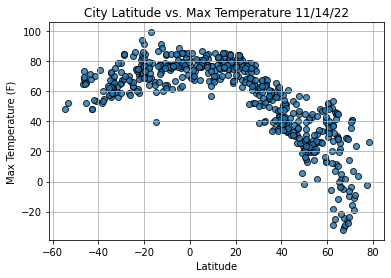

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

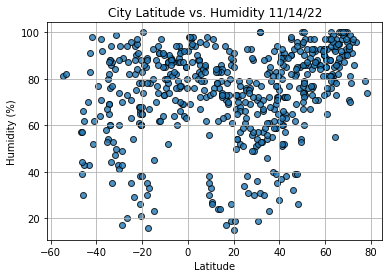

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

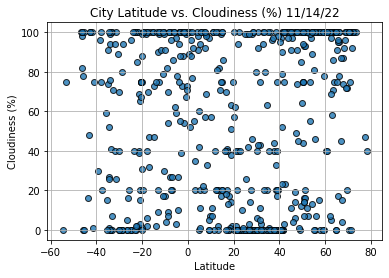

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

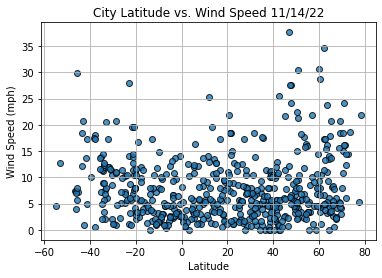

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()